In [ ]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load Data & Visualize It

In [ ]:
'''
Should be doing something like file = pd.read_csv(filepath in string format)
'''
file1= pd.read_csv("/content/ex1.txt",names=["size","price"])


In [ ]:
file1.head()

,size,price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
file1.describe()#data statistics

,size,price
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'scatter plot')

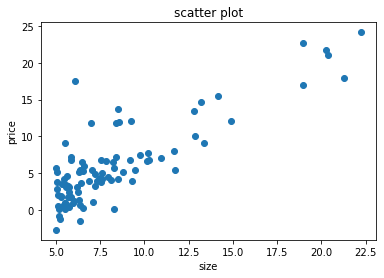

In [ ]:
plt.scatter(file1["size"].values,file1["price"].values)
plt.xlabel("size")
plt.ylabel("price")
plt.title("scatter plot")

# Loss Function 

In [ ]:
'''
Here will define the loss function/ cost function 
Should be something that takes:
1- Predictions 
2- GroundTruth/ True Values 

& Returns:
Single value = the sum of the (preds-groundtruth)^2 for each entry
'''
def CoastFunc (Predictions,GroundTruth):
  m = len(Predictions)
  coast=(1/(2*m))*np.sum((Predictions-GroundTruth)**2,axis=0)#axis=0 => it takes the sum of rows 
  return coast

# Your optimization [ Known as Gradient Descent ]

In [91]:
'''
Here will define the optimization function 
it will update the weights of our predictive model

Wnew = Wold - d/dt(loss)

This straightforward function is known as gradient descent
'''
def GradientDescent (x,GroundTruth,iterations):
  theta0,theta1=0.05,0.05
  m = len(GroundTruth)
  coast_li=[]
  for i in range(iterations) :
    Predictions=theta0+theta1*x
    d_theta0=[]
    d_theta1=[]

    for ii in range(m) :
      d_theta0.append((Predictions[ii]-GroundTruth[ii]))
      d_theta1.append((Predictions[ii]-GroundTruth[ii])*x[ii])
    coast_li.append(CoastFunc(Predictions,GroundTruth))
    theta0 = theta0 - (0.001)*(1/m)*np.sum(d_theta0)
    theta1 = theta1 - (0.001)*(1/m)*np.sum(d_theta1)
  return theta0, theta1 , coast_li


# Train 

In [98]:
x= file1["size"].values
y= file1["price"].values
w0,w1,coast_li=GradientDescent(x,y,100000) 


# Predictions and loss plot

In [ ]:
predections =w0+(w1*file1["size"].values)
print(predections)
coast=CoastFunc(predections,file1["price"].values)
print(coast)

In [ ]:
file1["predictions"]=predections

In [ ]:
file1.iloc[10:20]

,size,price,predictions
10,5.7107,3.25220,2.917276
11,14.1640,15.50500,13.002348
12,5.7340,3.15510,2.945074
13,8.4084,7.22580,6.135723
14,5.6407,0.71618,2.833764
15,5.3794,3.51290,2.522024
16,6.3654,5.30480,3.698356
17,5.1301,0.56077,2.224601
18,6.4296,3.65180,3.774948
19,7.0708,5.38930,4.539921


Text(0.5, 1.0, 'loss plot')

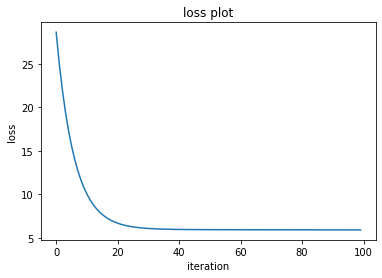

In [97]:
plt.plot(coast_li[:100])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss plot")